01520_0
1/1 [==============================] - 0s 167ms/step
Predicted Class Labels: [1]
Predicted Regression Boxes: [[0.4855037  0.43058985 0.42024314 0.43528152]]
1/1 [==============================] - 0s 73ms/step
Predicted Class Labels: [3]
Predicted Regression Boxes: [[0.38607076 0.37299067 0.35199803 0.34370947]]


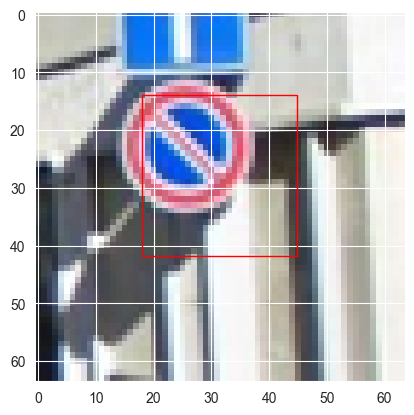

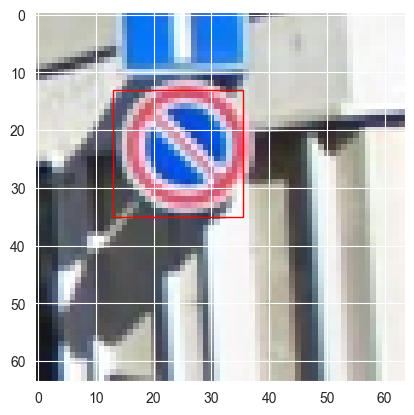

In [14]:
#Compare results of pretrained and fifth model
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model

number = 1

test_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\test'
save_img_PATH = 'C:\\Users\\marru\\Pictures\\final_comparison'
generic_PATH = 'C:\\Users\\marru\\Pictures\\cnns'

pretrained_PATH = os.path.join(generic_PATH, 'pretrained_model\\pretrained_model.h5')
fifth_model_PATH = os.path.join(generic_PATH, 'fifth_model_1\\fifth_model_1.h5')

# Load trained model
pretrained_model = tf.keras.models.load_model(pretrained_PATH)
fifth_model = tf.keras.models.load_model(fifth_model_PATH)

# Choose random image from the list
image_filenames = [filename[:-4] for filename in os.listdir(test_PATH) if filename.endswith('.jpg')]
image_filename = random.choice(image_filenames)
print(image_filename)

# Paths in which we have the information
image_path = os.path.join(test_PATH, image_filename + '.jpg')

# Load a new image and preprocess it
new_image = Image.open(image_path)
new_image = new_image.resize((64, 64))
new_image_array = np.array(new_image) / 255.0
new_image_array = np.expand_dims(new_image_array, axis=0)  # Add batch dimension

#----------PRETRAINED----------#
# Make predictions using the model
predictions = pretrained_model.predict(new_image_array)

# Retrieve the predicted class labels and regression boxes
predicted_class_labels = predictions[0]  # The first output corresponds to classification
predicted_regression_boxes = predictions[1]  # The second output corresponds to regression

# If you used one-hot encoding for class labels, you can convert them back to class indices
predicted_class_indices = np.argmax(predicted_class_labels, axis=1)

# Now, you have the predicted class labels and regression boxes for the new image
print("Predicted Class Labels:", predicted_class_indices)
print("Predicted Regression Boxes:", predicted_regression_boxes)

# Display the image
plt.imshow(new_image)

# Plot bounding boxes on the image
for box in predicted_regression_boxes:
    x, y, width, height = box  # Extract box coordinates
    x *= new_image.width  # Scale box coordinates to image size
    y *= new_image.height
    width *= new_image.width
    x1 = round(x - width / 2)
    height *= new_image.height
    y1 = round(y - height / 2)
    # Create a rectangle patch
    rect = plt.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

plt.savefig(os.path.join(save_img_PATH, 'pretrained_model_' + str(number) + '.png'))

plt.figure()

#----------FIFTH----------#
# Make predictions using the model
predictions = fifth_model.predict(new_image_array)

# Retrieve the predicted class labels and regression boxes
predicted_class_labels = predictions[0]  # The first output corresponds to classification
predicted_regression_boxes = predictions[1]  # The second output corresponds to regression

# If you used one-hot encoding for class labels, you can convert them back to class indices
predicted_class_indices = np.argmax(predicted_class_labels, axis=1)

# Now, you have the predicted class labels and regression boxes for the new image
print("Predicted Class Labels:", predicted_class_indices)
print("Predicted Regression Boxes:", predicted_regression_boxes)

# Display the image
plt.imshow(new_image)

# Plot bounding boxes on the image
for box in predicted_regression_boxes:
    x, y, width, height = box  # Extract box coordinates
    x *= new_image.width  # Scale box coordinates to image size
    y *= new_image.height
    width *= new_image.width
    x1 = round(x - width / 2)
    height *= new_image.height
    y1 = round(y - height / 2)
    # Create a rectangle patch
    rect = plt.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

plt.savefig(os.path.join(save_img_PATH, 'fifth_model_' + str(number) + '.png'))

# Show the image with bounding boxes
plt.show()